In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report, accuracy_score

In [10]:
df = pd.read_csv("Dataset .csv")
print("Dataset info:")
print("Dataset shape:", df.shape)
print("Dataset info:")
display(df.info())
display(df.head())
    

Dataset info:
Dataset shape: (9551, 21)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now 

None

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Missing values in the dataset:


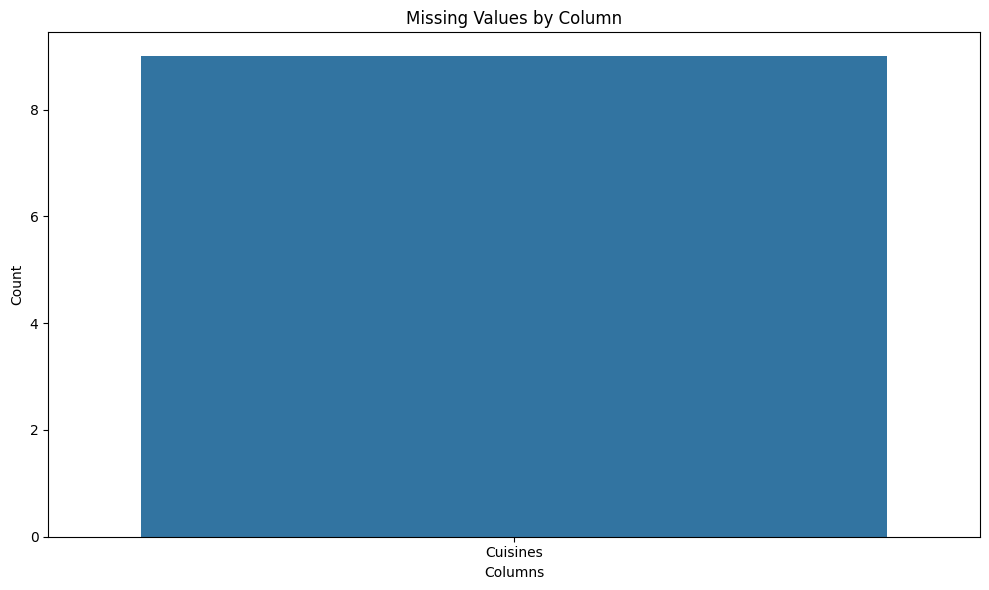

In [12]:
print("Missing values in the dataset:")
plt.figure(figsize=(10, 6))
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if len(missing) > 0:
    sns.barplot(x=missing.index, y=missing.values)
    plt.title('Missing Values by Column')
    plt.xticks(rotation=0, ha='center')
    plt.xlabel('Columns')
    plt.ylabel('Count')
    plt.tight_layout()
    
else:
    print("No missing values in the dataset.")

In [13]:
df = df.dropna(subset=["Cuisines"])

In [23]:
print("Missing values in the dataset:")
plt.figure(figsize=(10, 6))
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if len(missing) > 0:
    sns.barplot(x=missing.index, y=missing.values)
    plt.title('Missing Values by Column')
    plt.xticks(rotation=0, ha='center')
    plt.xlabel('Columns')
    plt.ylabel('Count')
    plt.tight_layout()
    
else:
    print("No missing values in the dataset.")

Missing values in the dataset:
No missing values in the dataset.


<Figure size 1000x600 with 0 Axes>

In [14]:
df["Cuisine_List"] = df["Cuisines"].apply(lambda x: [c.strip() for c in x.split(",")])

In [18]:
df["combined_text"] = df["Restaurant Name"].astype(str) + " " + \
                      df["Rating text"].astype(str) + " " + \
                      df["Cuisines"].astype(str)

In [19]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df["Cuisine_List"])
labels = mlb.classes_

In [20]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df["combined_text"])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

c:\Users\bossg\miniconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 26 is present in all training examples.
  warnings.warn(
c:\Users\bossg\miniconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 105 is present in all training examples.
  warnings.warn(
c:\Users\bossg\miniconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 107 is present in all training examples.
  warnings.warn(


In [24]:
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True, zero_division=0)
df_report = pd.DataFrame(report).transpose()
accuracy = accuracy_score(y_test, y_pred)

In [25]:
print(f"Accuracy: {accuracy:.4f}")
print(df_report.head())

Accuracy: 0.8539
          precision    recall  f1-score  support
Afghani    0.000000  0.000000  0.000000      4.0
African    1.000000  0.666667  0.800000      3.0
American   0.958904  0.958904  0.958904     73.0
Andhra     0.000000  0.000000  0.000000      2.0
Arabian    1.000000  1.000000  1.000000      2.0


C:\Users\bossg\AppData\Local\Temp\ipykernel_17620\2548732705.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisine_counts, y=top_cuisine_names, palette='coolwarm')


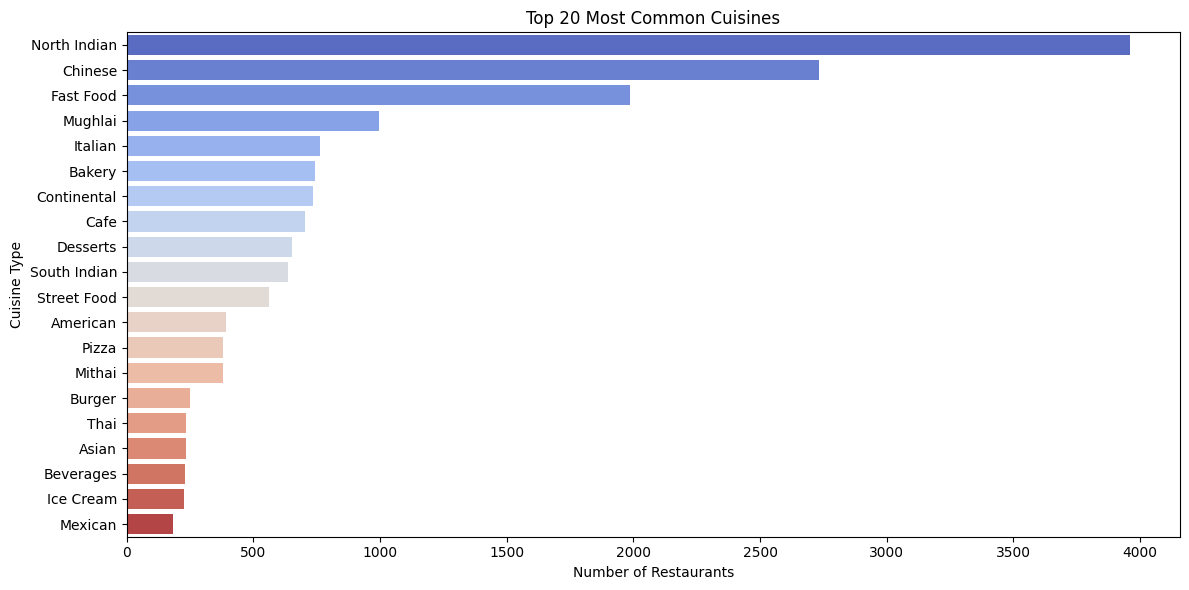

In [26]:
label_counts = y.sum(axis=0)
top_labels = np.argsort(label_counts)[::-1][:20]
top_cuisine_counts = label_counts[top_labels]
top_cuisine_names = labels[top_labels]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisine_counts, y=top_cuisine_names, palette='coolwarm')
plt.title("Top 20 Most Common Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Type")
plt.tight_layout()
plt.show()

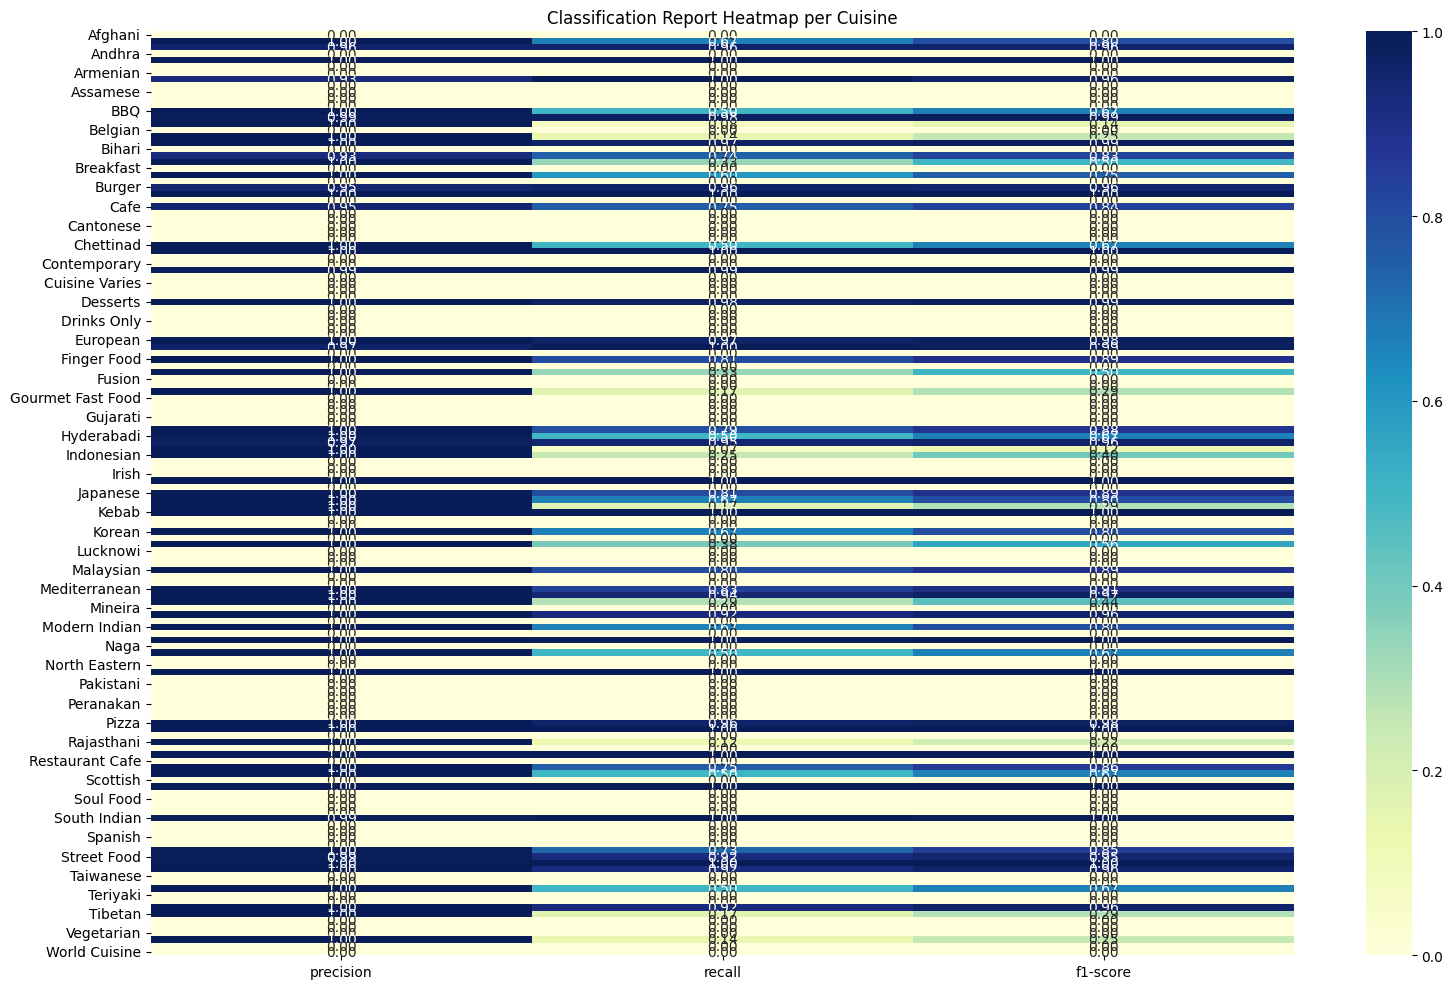

In [27]:
df_metrics = df_report.loc[labels, ['precision', 'recall', 'f1-score']]
plt.figure(figsize=(16, 10))
sns.heatmap(df_metrics, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Classification Report Heatmap per Cuisine")
plt.tight_layout()
plt.show()

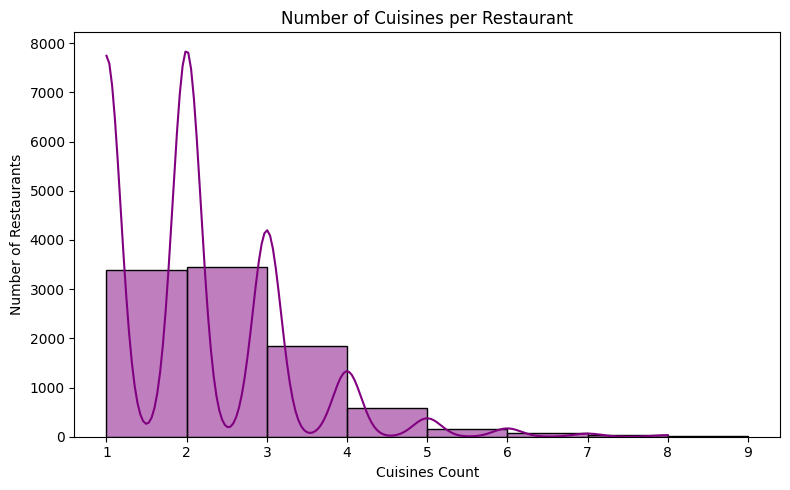

In [28]:
df["num_cuisines"] = df["Cuisine_List"].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(df["num_cuisines"], bins=range(1, 10), kde=True, color="purple")
plt.title("Number of Cuisines per Restaurant")
plt.xlabel("Cuisines Count")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()